In [99]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.image as mpimg
import os

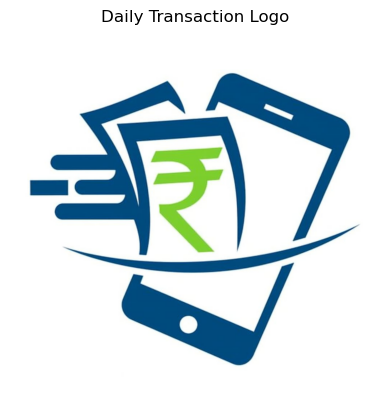

In [100]:
image_path = "Daily Transaction Logo.jpeg"

if os.path.exists(image_path):
    # Load the image
    img = mpimg.imread(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off') # Hide axes
    plt.title('Daily Transaction Logo')
    plt.show()
else:
    print(f"Error: Image file not found at {image_path}")

In [101]:
df = pd.read_csv("Daily Household Transactions.csv")

In [102]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [103]:
df.shape

(2461, 8)

In [104]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2461 non-null   datetime64[ns]
 1   Mode            2461 non-null   object        
 2   Category        2461 non-null   object        
 3   Subcategory     1826 non-null   object        
 4   Note            1940 non-null   object        
 5   Amount          2461 non-null   float64       
 6   Income/Expense  2461 non-null   object        
 7   Currency        2461 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 153.9+ KB


In [106]:
df['Mode'] = df['Mode'].str.title()
df['Category'] = df['Category'].str.title()
df['Subcategory'] = df['Subcategory'].str.title()
df['Income/Expense'] = df['Income/Expense'].str.title()

In [107]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [108]:
df.fillna('Unknown', inplace=True)

In [109]:
df.dtypes

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object

In [110]:
df["Category"].value_counts()

Category
Food                         907
Transportation               307
Household                    176
Subscription                 143
Other                        126
Investment                   103
Health                        94
Family                        71
Recurring Deposit             47
Apparel                       47
Money Transfer                43
Salary                        43
Gift                          30
Public Provident Fund         29
Equity Mutual Fund E          22
Beauty                        22
Gpay Reward                   21
Education                     18
Maid                          17
Saving Bank Account 1         17
Festivals                     16
Equity Mutual Fund A          14
Equity Mutual Fund F          13
Interest                      12
Dividend Earned On Shares     12
Culture                       11
Small Cap Fund 1              10
Small Cap Fund 2              10
Share Market                   8
Maturity Amount                7
L

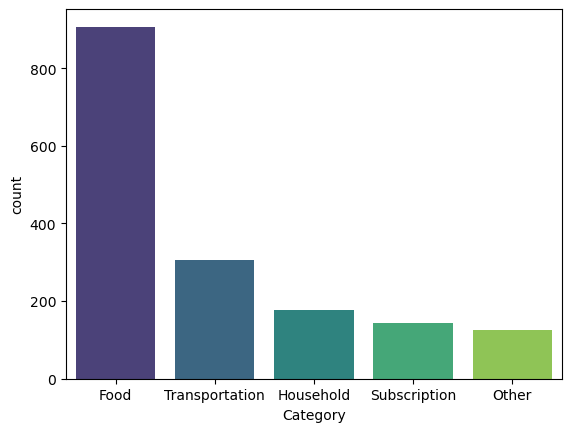

In [111]:
sns.countplot(data = df, x = "Category", order = df["Category"].value_counts().iloc[:5].index, palette = "viridis");

In [112]:
df["Subcategory"].unique()

array(['Train', 'Snacks', 'Netflix', 'Mobile Service Provider',
       'Ganesh Pujan', 'Tata Sky', 'Auto', 'Unknown', 'Grocery', 'Lunch',
       'Milk', 'Pocket Money', 'Laundry', 'Breakfast', 'Dinner', 'Sweets',
       'Kirana', 'Ice Cream', 'Curd', 'Biscuits', 'Rajgira Ladu',
       'Navratri', 'Tea', 'Flour Mill', 'Appliances', 'Home Decor',
       'Grooming', 'Health', 'Clothing', 'Clothes', 'Home', 'Chocolate',
       'Medicine', 'Eating Out', 'Movie', 'Vegetables', 'Fruits',
       'Potato', 'Onions', 'Taxi', 'Hardware', 'Eggs', 'Bread', 'Petrol',
       'Hospital', 'Mahanagar Gas', 'Lab Tests', 'Bus', 'Travels',
       'Kitchen', 'Footwear', 'Entry Fees', 'Gadgets', 'Accessories',
       'Misc', 'Stationary', 'Newspaper', 'Toiletries', 'Bike',
       'Beverage', 'Makeup', 'Books', 'Holi', 'Courier', 'Leisure',
       'Updation', 'Amazon Prime', 'Edtech Course', 'Hotstar', 'Diwali',
       'Wifi Internet Service', 'Trip', 'Furniture', 'Water', 'Cable Tv',
       'Mutual Fund', 'P

In [113]:
# Categories with 'Unknown' subcategories
unknown_subcategory_categories = df[df['Subcategory'] == 'Unknown']['Category'].value_counts()

print("Categories with 'Unknown' Subcategories:\n")
print(unknown_subcategory_categories)

Categories with 'Unknown' Subcategories:

Category
Other                        126
Food                          85
Recurring Deposit             47
Salary                        43
Gift                          30
Public Provident Fund         29
Money Transfer                28
Transportation                24
Equity Mutual Fund E          22
Gpay Reward                   21
Maid                          17
Saving Bank Account 1         17
Equity Mutual Fund A          14
Equity Mutual Fund F          13
Dividend Earned On Shares     12
Interest                      12
Small Cap Fund 1              10
Small Cap Fund 2              10
Share Market                   8
Maturity Amount                7
Life Insurance                 7
Petty Cash                     6
Equity Mutual Fund C           6
Bonus                          6
Rent                           4
Cook                           4
Household                      3
Saving Bank Account 2          3
Water (Jar /Tanker)      

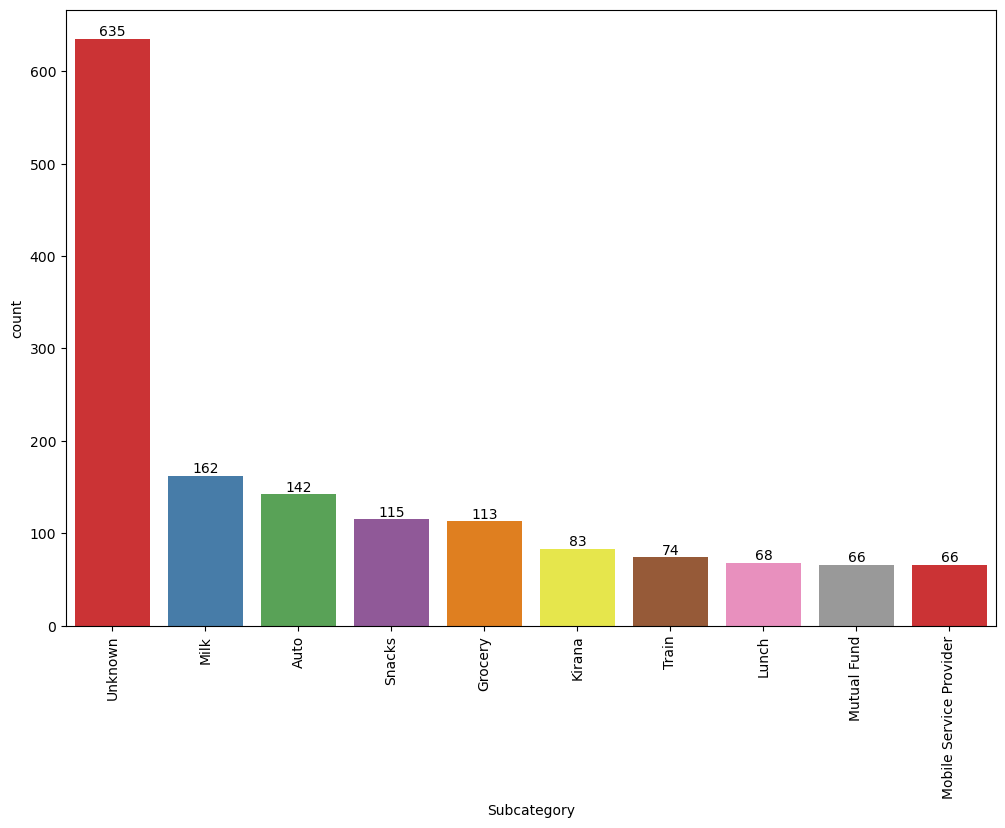

In [114]:
plt.figure(figsize = (12,8))
ax = sns.countplot(data = df, x = "Subcategory", order = df["Subcategory"].value_counts().iloc[:10].index, palette = "Set1")
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

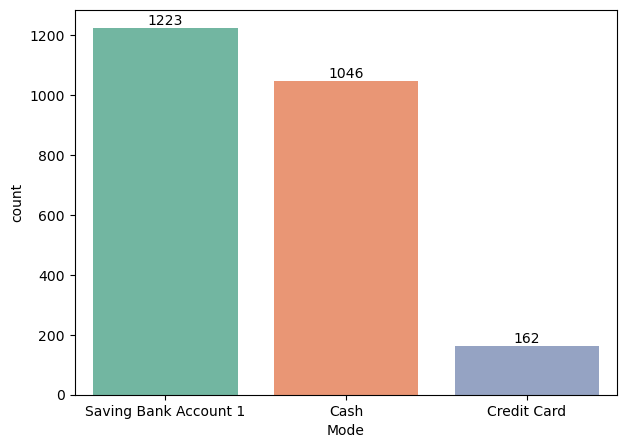

In [115]:
plt.figure(figsize = (7,5))
ax = sns.countplot(data = df, x = "Mode", order = df["Mode"].value_counts().iloc[:3].index, palette = "Set2")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

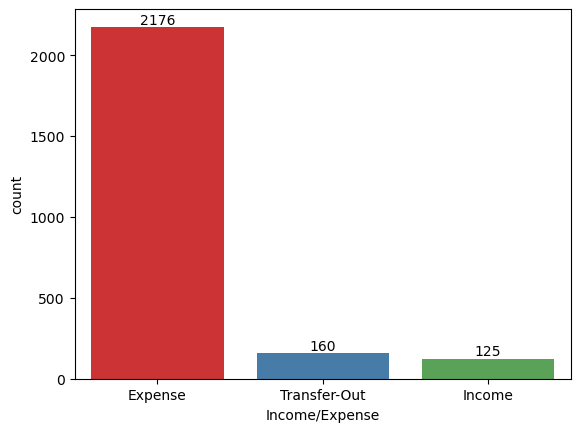

In [116]:
ax = sns.countplot(data = df, x = "Income/Expense", palette = "Set1");

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points');

In [117]:
print("Unique Notes : ",df["Note"].nunique())

Unique Notes :  1058


In [118]:
print(df['Currency'].value_counts())

Currency
INR    2461
Name: count, dtype: int64


In [119]:
# Descriptive statistics for 'Amount' column
df['Amount'].describe()

count      2461.000000
mean       2751.145380
std       12519.615804
min           2.000000
25%          35.000000
50%         100.000000
75%         799.000000
max      250000.000000
Name: Amount, dtype: float64

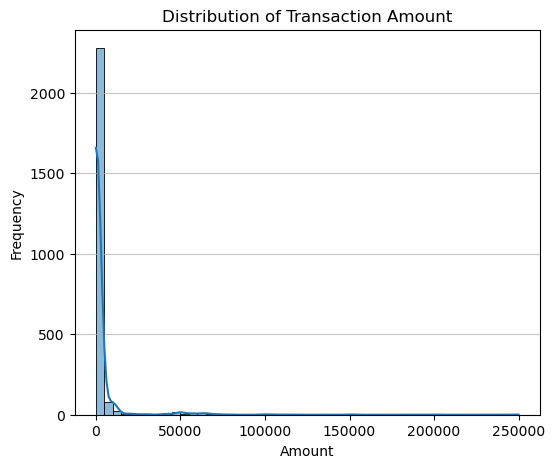

In [120]:
# Plotting the distribution of 'Amount' using a histogram
plt.figure(figsize=(6 , 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

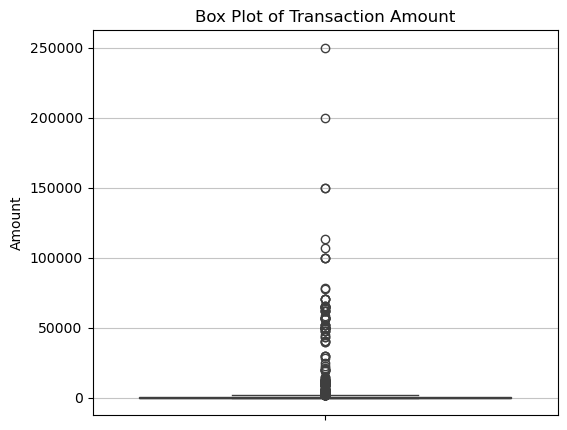

In [121]:
# Plotting the distribution of 'Amount' using a box plot to identify outliers
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Amount'])
plt.title('Box Plot of Transaction Amount')
plt.ylabel('Amount')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [122]:
# Most used Mode of Transaction
count_of_mode = df['Mode'].value_counts()
count_of_mode

Mode
Saving Bank Account 1    1223
Cash                     1046
Credit Card               162
Equity Mutual Fund B       11
Share Market Trading        5
Saving Bank Account 2       5
Recurring Deposit           3
Debit Card                  2
Equity Mutual Fund C        1
Equity Mutual Fund A        1
Equity Mutual Fund D        1
Fixed Deposit               1
Name: count, dtype: int64

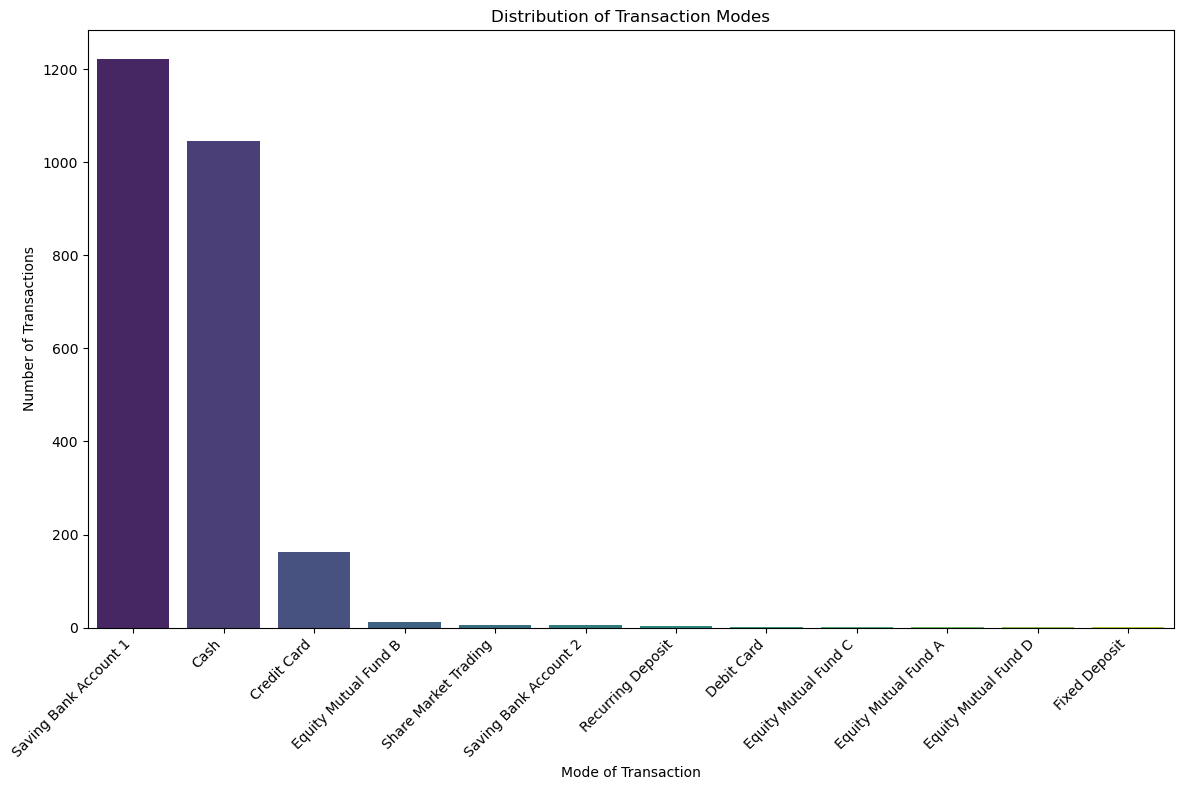

In [123]:
plt.figure(figsize=(12, 8))
sns.barplot(x=count_of_mode.index, y=count_of_mode.values, palette='viridis')
plt.title('Distribution of Transaction Modes')
plt.xlabel('Mode of Transaction')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [124]:
# Top 10 Costly Categories
top_costly_Category = df.groupby('Category')['Amount'].sum().nlargest(10)
top_costly_Category

Category
Salary                   2526576.45
Money Transfer            606528.90
Fixed Deposit             450000.00
Maturity Amount           382792.00
Public Provident Fund     345000.00
Share Market              276161.00
Saving Bank Account 1     274798.57
Investment                271858.00
Other                     170467.28
Transportation            169053.78
Name: Amount, dtype: float64

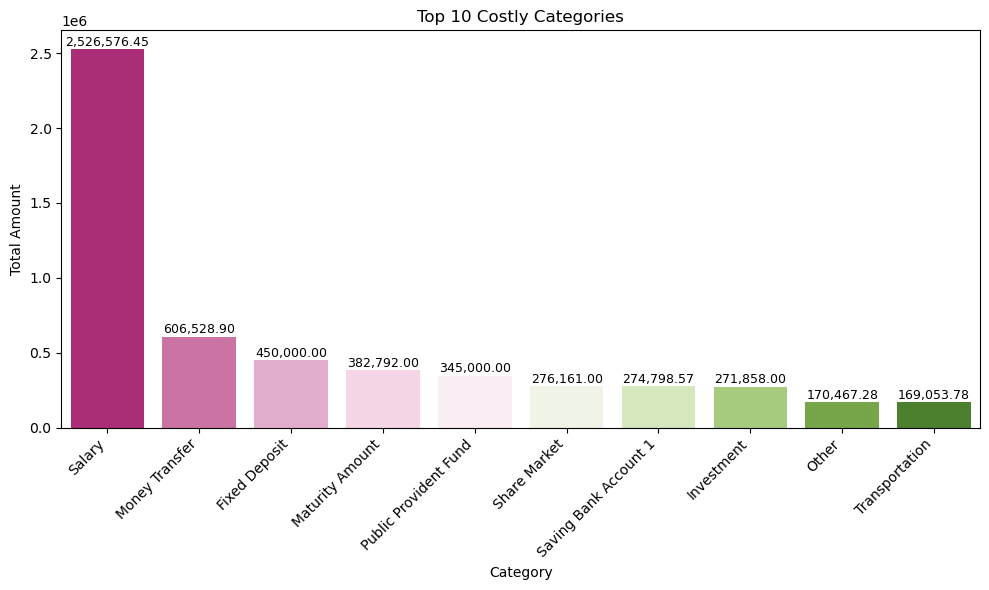

In [125]:
# Visualize Top 10 Costly Categories
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_costly_Category.index, y=top_costly_Category, palette = "PiYG")
plt.title('Top 10 Costly Categories')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [126]:
# Top 10 Costly Subcategories
top_costly_Subcategory = df.groupby('Subcategory')['Amount'].sum().nlargest(10)
top_costly_Subcategory

Subcategory
Unknown                  5514850.53
Home                      204505.90
Public Provident Fund     150000.00
Bike                       94593.00
Appliances                 82081.00
Mutual Fund                66000.00
Edtech Course              63733.42
Trip                       63300.00
Pocket Money               58195.00
Kirana                     39147.58
Name: Amount, dtype: float64

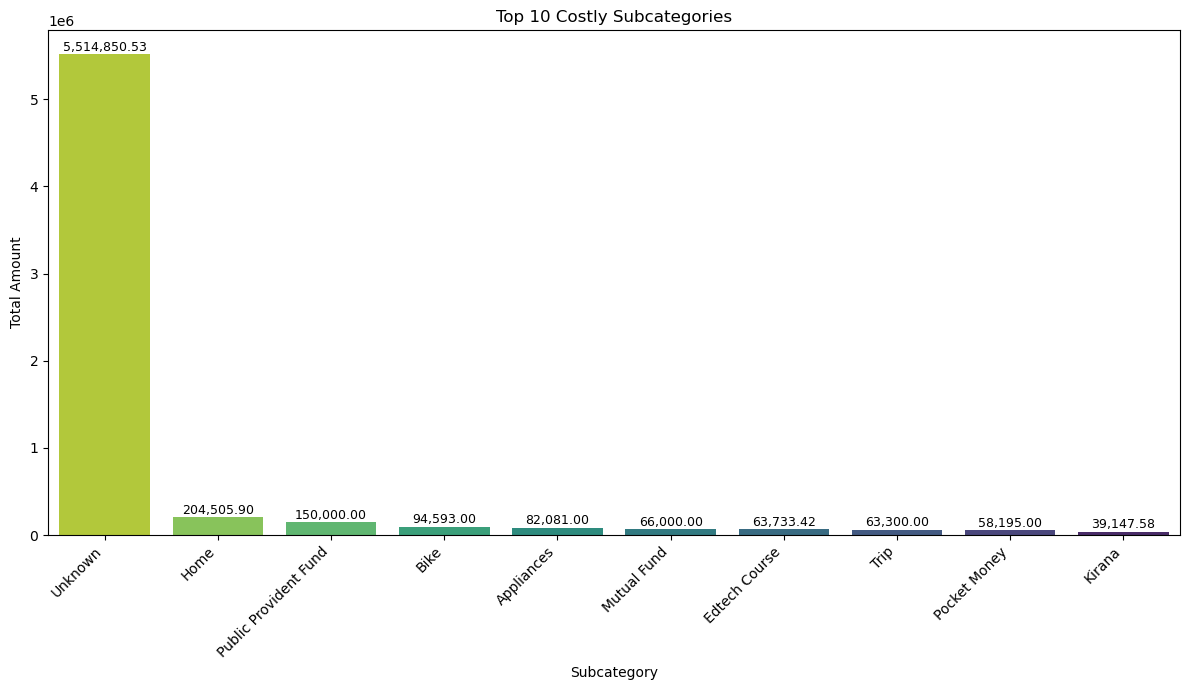

In [127]:
# Visualize Top 10 Costly Subcategories
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=top_costly_Subcategory.index, y=top_costly_Subcategory, palette='viridis_r')
plt.title('Top 10 Costly Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

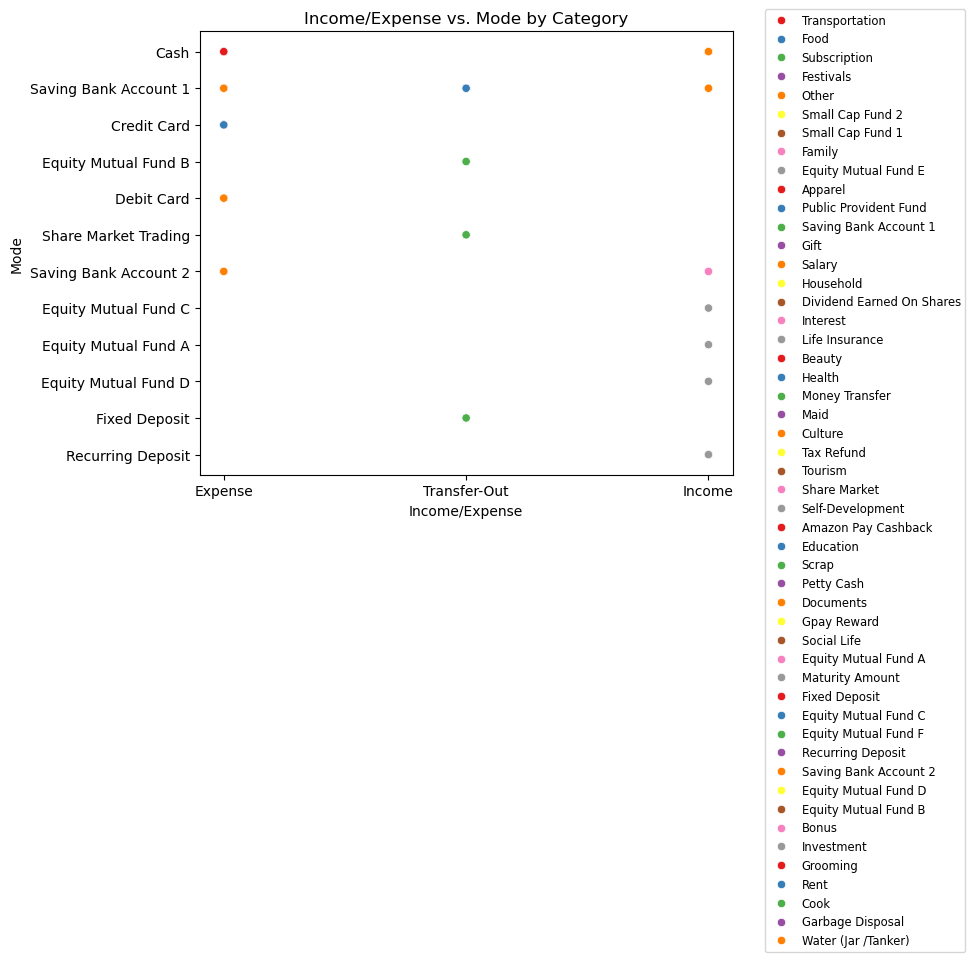

In [128]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Income/Expense', y='Mode', hue='Category', palette='Set1')
plt.title('Income/Expense vs. Mode by Category')
plt.xlabel('Income/Expense')
plt.ylabel('Mode')
plt.legend(bbox_to_anchor=(1.06, 1.05), loc='upper left', borderaxespad=0., fontsize='small')
plt.tight_layout()
plt.show()

In [129]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

print(df[['Date', 'Year', 'Month', 'DayOfWeek']].head())

                 Date  Year  Month  DayOfWeek
0 2018-09-20 12:04:08  2018      9   Thursday
1 2018-09-20 12:03:15  2018      9   Thursday
2 2018-09-19 00:00:00  2018      9  Wednesday
3 2018-09-17 23:41:17  2018      9     Monday
4 2018-09-16 17:15:08  2018      9     Sunday


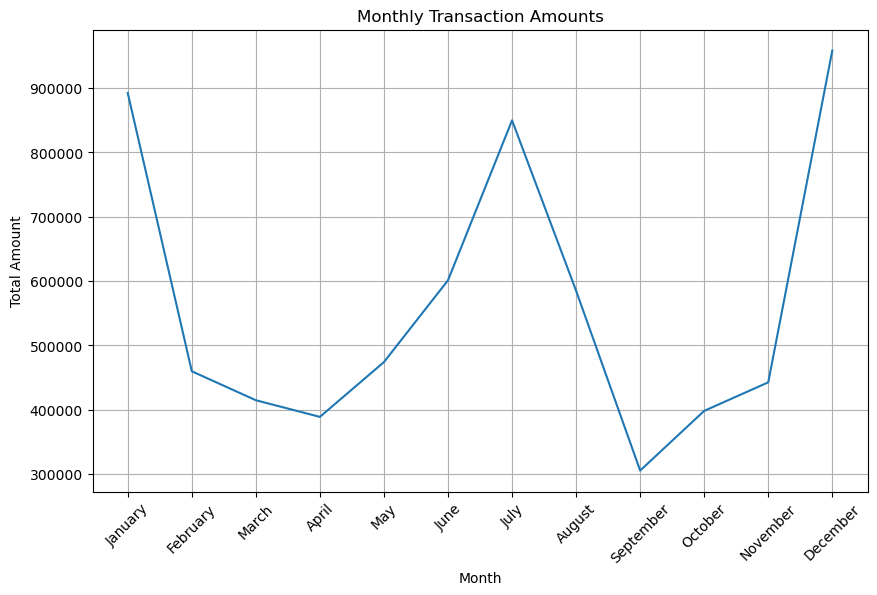

In [130]:
import calendar
monthly_amounts = df.groupby('Month')['Amount'].sum()

# Mapping month numbers to month names
monthly_amounts.index = [calendar.month_name[m] for m in monthly_amounts.index]

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_amounts.index, y=monthly_amounts.values)
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

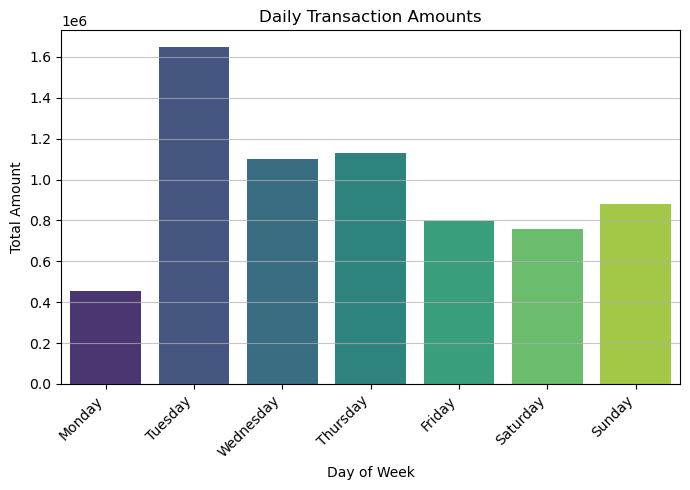

In [133]:
daily_amounts = df.groupby('DayOfWeek')['Amount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) # Reindex to ensure consistent order of days

plt.figure(figsize=(7 , 5))
sns.barplot(x=daily_amounts.index, y=daily_amounts.values, palette='viridis')
plt.title('Daily Transaction Amounts')
plt.xlabel('Day of Week')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

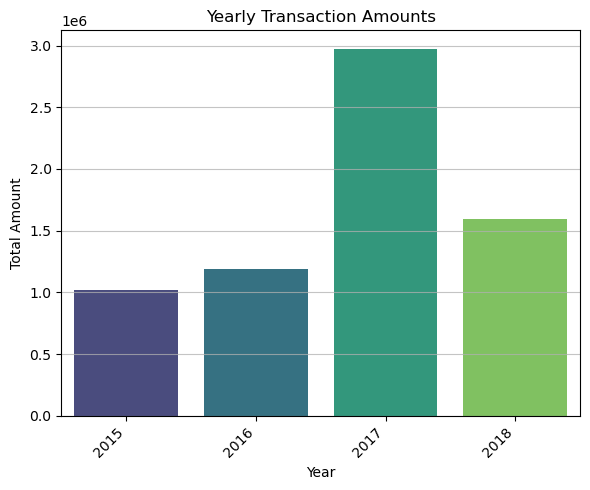

In [132]:
yearly_amounts = df.groupby('Year')['Amount'].sum()

plt.figure(figsize=(6 , 5))
sns.barplot(x=yearly_amounts.index, y=yearly_amounts.values, palette='viridis')
plt.title('Yearly Transaction Amounts')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Conclusion

This comprehensive analysis provided a robust understanding of the daily household transaction dataset. It effectively demonstrated that the individual's household transactions are small; a few large transactions significantly affect the overall distribution of amounts. 'Saving Bank Account 1' and 'Cash' emerged as the primary modes of transaction. Key spending areas include household expenses, investments, and transportation, alongside significant income entries. The time-series analysis successfully highlighted monthly, daily, and yearly patterns, offering insights into the temporal aspects of financial behavior. The systematic preprocessing steps ensured the data was clean, consistent, and well-structured for these in-depth explorations.